In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score, davies_bouldin_score, adjusted_mutual_info_score
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
green_data = pd.read_csv('../green_consensus.csv')
hinselmann_data = pd.read_csv('../hinselmann_consensus.csv')
schiller_data = pd.read_csv('../schiller_consensus.csv')

green_data['hinselmann'] = 0
green_data['schiller'] = 0
green_data['green'] = 1
hinselmann_data['hinselmann'] = 1
hinselmann_data['schiller'] = 0
hinselmann_data['green'] = 0
schiller_data['hinselmann'] = 0
schiller_data['schiller'] = 1
schiller_data['green'] = 0

data = pd.concat([green_data, hinselmann_data, schiller_data])
data = data.reset_index(drop=True)

In [3]:
classes = ['experts::{}'.format(i) for i in range(5)]
classes.extend(['consensus', 'hinselmann', 'schiller', 'green'])
X = data.drop(columns=classes)
Q1 = X.quantile(0.05)
Q3 = X.quantile(0.95)
IQR = Q3 - Q1
color_cols = [col for col in X.columns if ('total' in col) and ('rgb' in col or 'hsv' in col)]
color_cols
X = X[color_cols]

X = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]


y = data.iloc[X.index]['consensus']
y_dataset = data.iloc[X.index][['green', 'schiller', 'hinselmann']].idxmax(axis=1)
y_dataset = y_dataset.map({'green': 0, 'hinselmann': 1, 'schiller': 1})
y_dataset = y_dataset.reset_index(drop=True)
X = PCA(0.95).fit_transform(X)

In [4]:
y_dataset.shape[0]

287

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
def kMeans(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    
    predicted = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    return labels

def hierarchical(X, n_clusters=2):
    ac = SpectralClustering(n_clusters=n_clusters)
    ac.fit(X)

    labels = ac.labels_
    return labels


In [7]:
kpred = kMeans(X, 2)
hpred = hierarchical(X, 2)

In [8]:
print(adjusted_mutual_info_score(y_dataset, kpred))
print(adjusted_mutual_info_score(y_dataset, hpred))

print(adjusted_rand_score(y_dataset, kpred))
print(adjusted_rand_score(y_dataset, hpred))


0.9660170996820544
0.8630548531784649
0.9859230529830181
0.93059966680439


/home/francisconeves/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [9]:
kpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

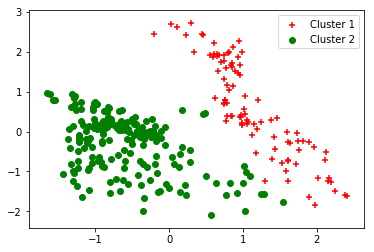

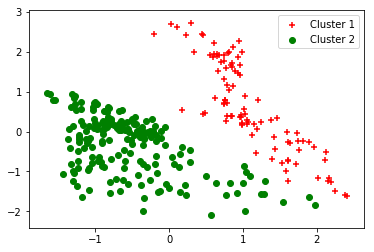

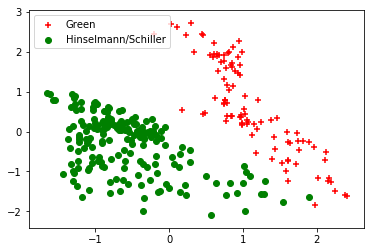

In [10]:
for i in range(0, X.shape[0]):
    if hpred[i] == 0:
        c1 = pl.scatter(X[i,0], X[i,1], c='r', marker="+")
    elif hpred[i] == 1:
        c2 = pl.scatter(X[i,0], X[i,1], c='g', marker="o")
    elif hpred[i] == 2:
        c3 = pl.scatter(X[i,0], X[i,1], c='b', marker="*")
        
#pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
pl.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
pl.show()

for i in range(0, X.shape[0]):
    if kpred[i] == 0:
        c1 = pl.scatter(X[i,0], X[i,1], c='r', marker="+")
    elif kpred[i] == 1:
        c2 = pl.scatter(X[i,0], X[i,1], c='g', marker="o")
    elif kpred[i] == 2:
        c3 = pl.scatter(X[i,0], X[i,1], c='b', marker="*")
        
#pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
pl.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
pl.show()

for i in range(0, X.shape[0]):
    if y_dataset[i] == 0:
        c1 = pl.scatter(X[i,0], X[i,1], c='r', marker="+")
    elif y_dataset[i] == 1:
        c2 = pl.scatter(X[i,0], X[i,1], c='g', marker="o")
    elif y_dataset[i] == 2:
        c3 = pl.scatter(X[i,0], X[i,1], c='b', marker="*")
        
#pl.legend([c1, c2, c3], ['Green', 'Hinselmann', 'Schiller'])
pl.legend([c1, c2], ['Green', 'Hinselmann/Schiller'])
pl.show()